In [1]:
import pandas as pd


df = pd.read_csv('online_retail.csv', encoding='ISO-8859-1')


In [5]:
# Show the first few rows
print(df.head())



  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2022-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [6]:

# Check the DataFrame shape (rows, columns)
print(f"Shape: {df.shape}")

Shape: (541909, 8)


In [7]:
# Data types and non-null counts
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:

# Summary statistics for numeric columns
print(df.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [9]:
# Count of missing values per column
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [10]:

# Count of duplicate rows
print(f"Duplicates: {df.duplicated().sum()}")

Duplicates: 5268


In [11]:
# Quick look at negative or zero quantities and prices
print("Non-positive quantities:", (df['Quantity'] <= 0).sum())
print("Non-positive unit prices:", (df['UnitPrice'] <= 0).sum())

Non-positive quantities: 10624
Non-positive unit prices: 2517


In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True, format= 'mixed')

In [15]:
print(df['InvoiceDate'].dtype)

datetime64[ns]


In [16]:
df = df.dropna(subset=['CustomerID'])
print(f"After removing missing CustomerID: {df.shape}")


After removing missing CustomerID: (406829, 8)


In [17]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
print(f"After removing cancelled orders: {df.shape}")


After removing cancelled orders: (397924, 8)


In [18]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
print(f"After removing non-positive Quantity/UnitPrice: {df.shape}")


After removing non-positive Quantity/UnitPrice: (397884, 8)


In [19]:
df = df.drop_duplicates()
print(f"After removing duplicates: {df.shape}")


After removing duplicates: (392692, 8)


In [20]:
df['CustomerID'] = df['CustomerID'].astype(str)


In [21]:
df['Description'] = df['Description'].str.strip()


In [22]:
print(f"Cleaned data shape: {df.shape}")
print(f"Number of unique customers: {df['CustomerID'].nunique()}")


Cleaned data shape: (392692, 8)
Number of unique customers: 4338


<Axes: title={'center': 'Distribution of Recency (in days)'}, ylabel='Frequency'>

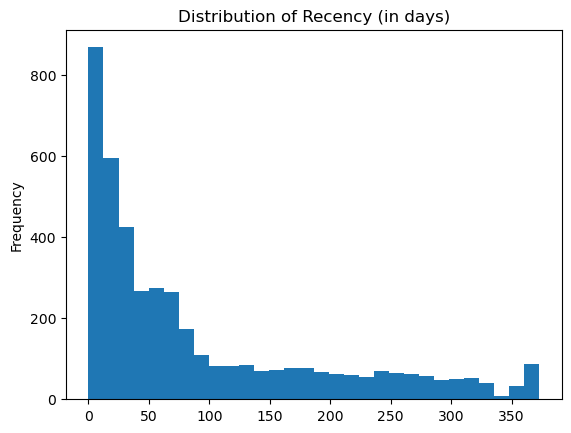

In [29]:
rfm['Recency'].plot(kind='hist', bins=30, title='Distribution of Recency (in days)')


<Axes: title={'center': 'Top 10 Countries by Revenue'}, xlabel='Country'>

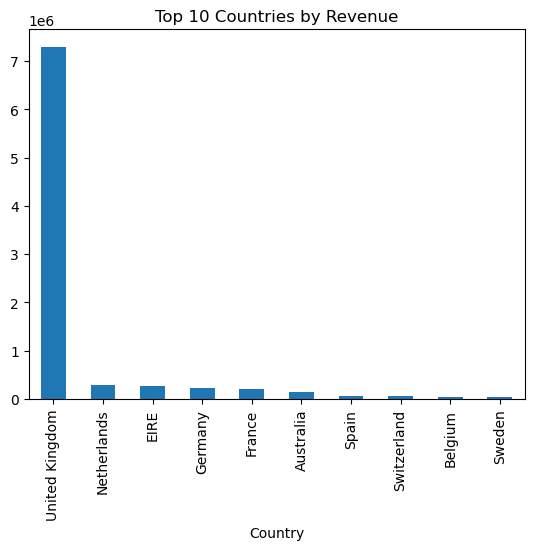

In [30]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
country_revenue.plot(kind='bar', title='Top 10 Countries by Revenue')


<Axes: title={'center': 'Top 10 Products by Quantity Sold'}, xlabel='Description'>

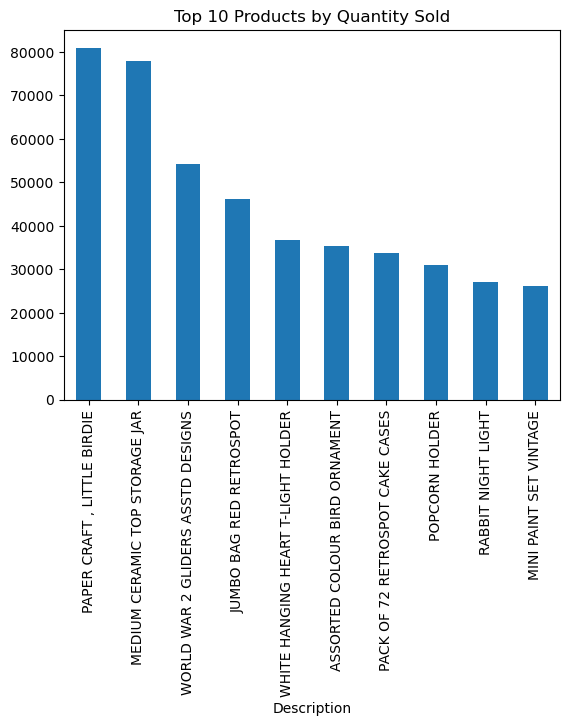

In [24]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Products by Quantity Sold')


Text(0.5, 1.0, 'Frequency vs. Monetary Spend')

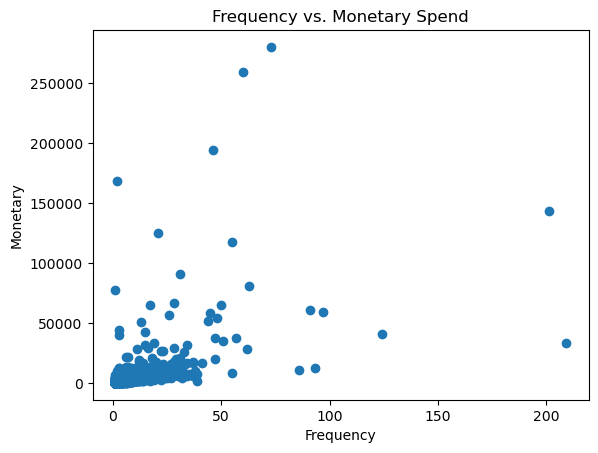

In [31]:
import matplotlib.pyplot as plt

plt.scatter(rfm['Frequency'], rfm['Monetary'])
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency vs. Monetary Spend')


<Axes: title={'center': 'Top 10 Products by Revenue'}, xlabel='Description'>

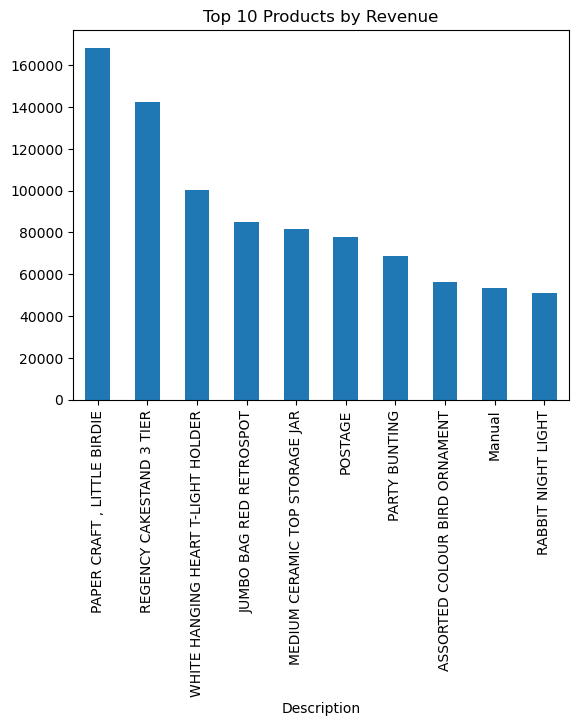

In [25]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
top_revenue_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
top_revenue_products.plot(kind='bar', title='Top 10 Products by Revenue')


C:\Users\Dell\AppData\Local\Temp\ipykernel_26020\579162189.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.set_index('InvoiceDate').resample('M')['Revenue'].sum()


<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='InvoiceDate'>

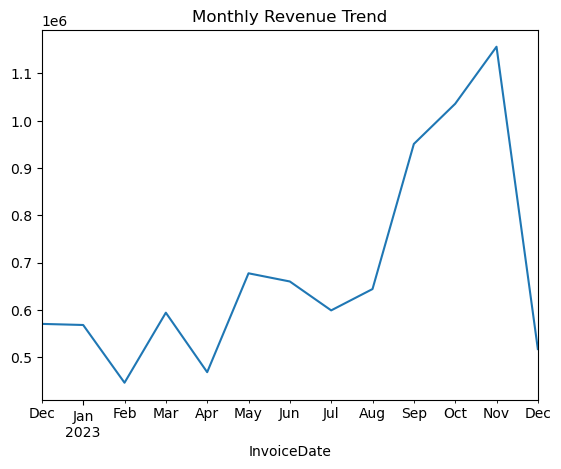

In [26]:
monthly_revenue = df.set_index('InvoiceDate').resample('M')['Revenue'].sum()
monthly_revenue.plot(title='Monthly Revenue Trend')


<Axes: >

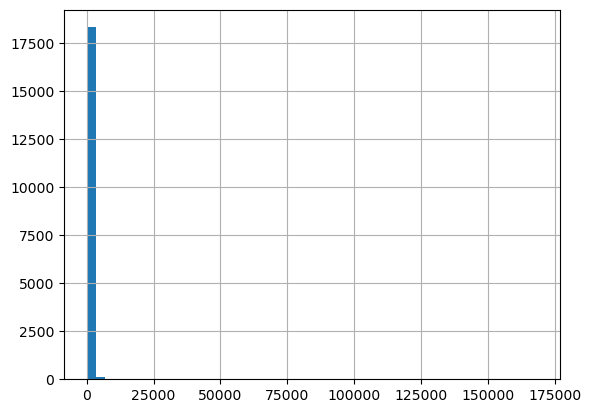

In [27]:
transaction_values = df.groupby('InvoiceNo')['Revenue'].sum()
transaction_values.hist(bins=50)


array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'Monetary'}>, <Axes: >]], dtype=object)

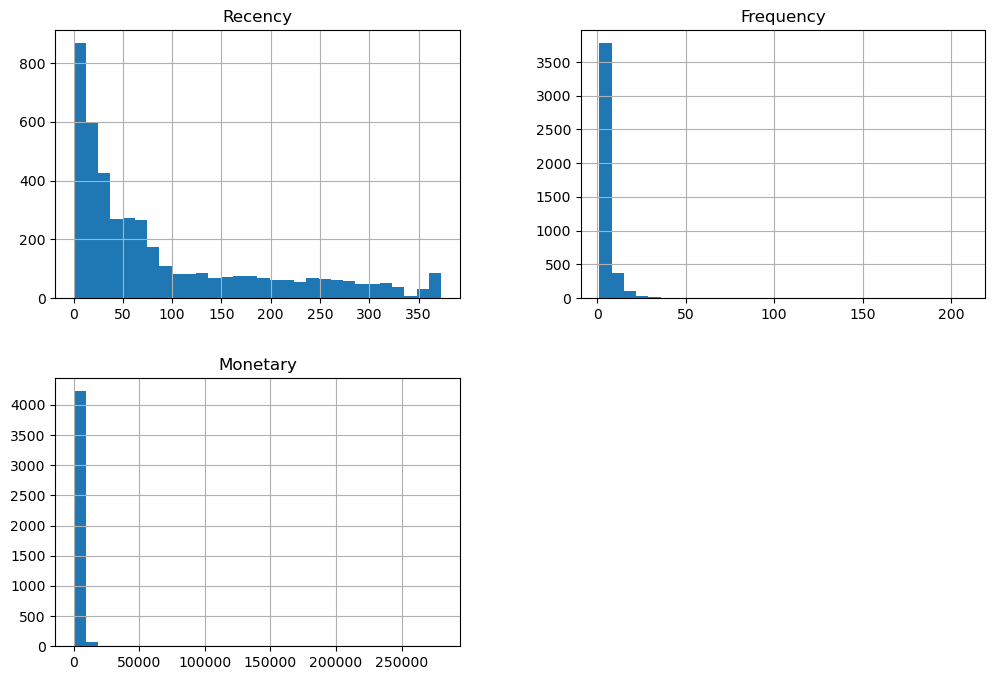

In [39]:
latest_date = df['InvoiceDate'].max()

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Revenue': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Histograms
rfm.hist(bins=30, figsize=(12, 8))


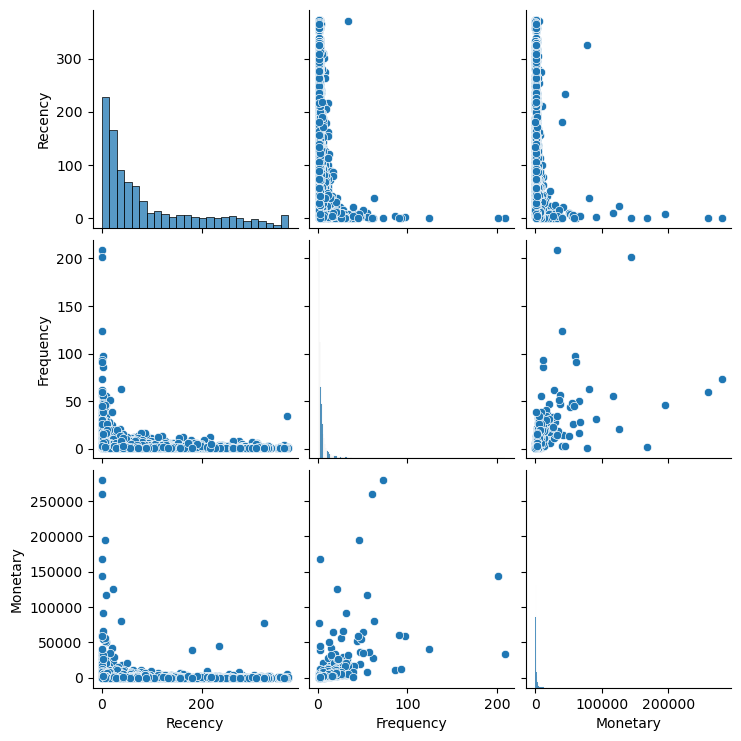

In [32]:
import seaborn as sns

sns.pairplot(rfm)


<Axes: >

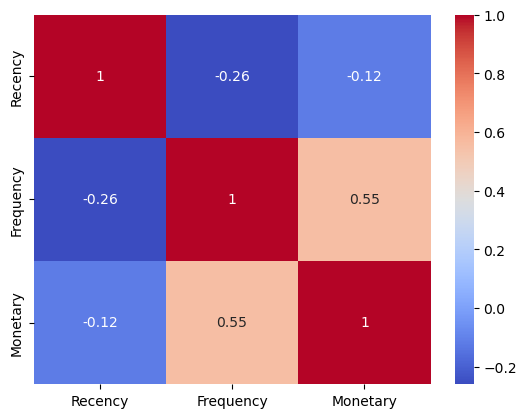

In [33]:
sns.heatmap(rfm.corr(), annot=True, cmap='coolwarm')


In [38]:
from datetime import timedelta

# Step 1: Create reference date (1 day after the last transaction in dataset)
latest_date = df['InvoiceDate'].max() + timedelta(days=1)

# Step 2: Group by CustomerID and calculate RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                  # Frequency
    'Revenue': 'sum'                                         # Monetary
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()


In [40]:
import numpy as np

rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].copy()
rfm_log['Recency'] = np.log1p(rfm_log['Recency'])
rfm_log['Frequency'] = np.log1p(rfm_log['Frequency'])
rfm_log['Monetary'] = np.log1p(rfm_log['Monetary'])


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)


In [51]:
# assuming `scaler` is the StandardScaler used on log-transformed RFM data
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

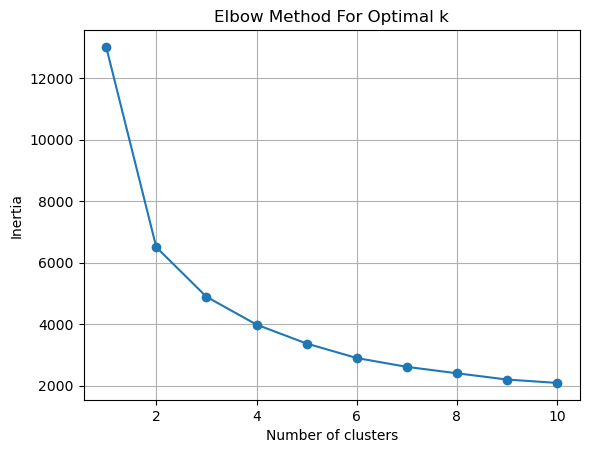

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()


In [43]:
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    print(f"Silhouette Score for k={k}: {score:.4f}")


Silhouette Score for k=2: 0.4344
Silhouette Score for k=3: 0.3390
Silhouette Score for k=4: 0.3356
Silhouette Score for k=5: 0.3149
Silhouette Score for k=6: 0.3101


In [44]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [45]:
rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)


,Recency,Frequency,Monetary
Cluster,,,
0,17.1,2.1,540.6
1,179.4,1.3,347.6
2,67.8,4.2,1830.5
3,10.4,14.0,8290.4


Text(0.5, 1.0, 'Customer Segments: Frequency vs. Monetary')

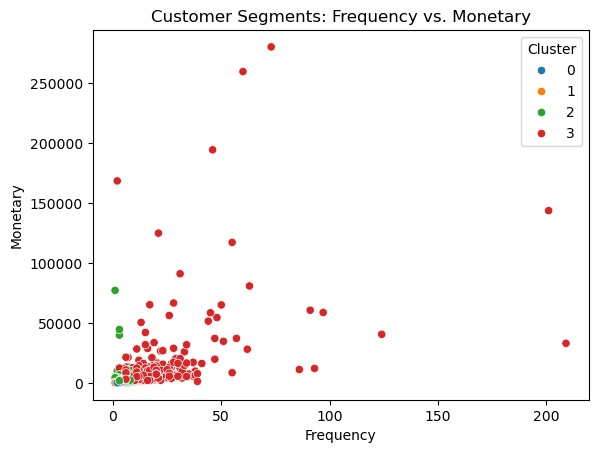

In [46]:
import seaborn as sns

sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='tab10')
plt.title("Customer Segments: Frequency vs. Monetary")


In [50]:
import joblib

# assuming `kmeans` is your final fitted KMeans model
joblib.dump(kmeans, 'rfm_model.pkl')


['rfm_model.pkl']

In [47]:
# Create matrix: rows = customers, columns = products, values = quantity
basket = df.pivot_table(index='CustomerID', columns='Description', values='Quantity', aggfunc='sum')

# Fill missing values with 0
basket.fillna(0, inplace=True)


In [48]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Transpose to get item-item matrix (each column = product vector)
item_similarity = cosine_similarity(basket.T)

# Store in DataFrame for easy lookup
item_sim_df = pd.DataFrame(item_similarity, index=basket.columns, columns=basket.columns)


In [49]:
def get_similar_products(product_name, n=5):
    if product_name not in item_sim_df.columns:
        return f"'{product_name}' not found in data."
    
    similar_items = item_sim_df[product_name].sort_values(ascending=False)[1:n+1]
    return similar_items


In [52]:
# assuming `item_sim_df` is the cosine similarity DataFrame of items
joblib.dump(item_sim_df, 'item_sim_df.pkl')


['item_sim_df.pkl']